In [1]:
import pandas as pd
import matplotlib.pylab as plt
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
rental_url = "https://raw.githubusercontent.com/CUSPcapstones/Digital-Traces-of-Gentrification_\
2018/master/data/nyc_median_historical.csv?token=AIn7gB0W6--IKsmsIaAIXY9IRV0llDWQks5a5JIrwA%3D%3D"

In [3]:
df = pd.read_csv(rental_url, index_col=0)

In [4]:
df.head()

,zipcode,CountyName,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,10025,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3440.0,3440.0,3405.0,3470.0,3402.5,3400.0,3495.0,3500.0,3402.5,3402.5
2,10023,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3750.0,3750.0,3800.0,3700.0,3600.0,3587.5,3700.0,3700.0,3700.0,3550.0
8,10002,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3225.0,3295.0,3295.0,3112.5,2850.0,3100.0,2920.0,3050.0,3050.0,3100.0
10,10467,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1150.0,1150.0,1175.0,1175.0,1175.0,1175.0,1200.0,1150.0,1295.0,1400.0
13,11226,Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1545.0,1650.0,1675.0,1547.5,1499.0,1522.5,1499.5,1499.5,1500.0,1625.0


In [65]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()



In [66]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")


In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

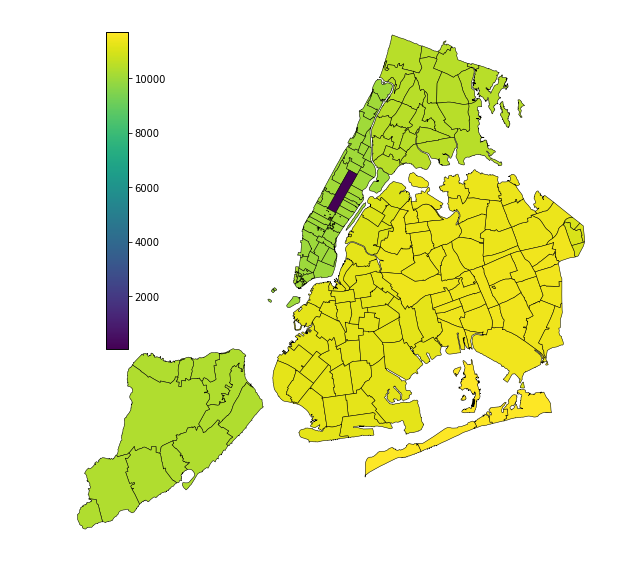

In [74]:
cp.choroplethNYC(zipcodes, column="ZIPCODE", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [7]:
# imputing values by backfilling the rows. The averages would be similar among zipcodes and not in the year
df = df.T.fillna(method='bfill').T

In [8]:
df.head()

,zipcode,CountyName,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,10025,New York,2575,2575,2575,2575,2575,2575,2575,2575,...,3440,3440,3405,3470,3402.5,3400,3495,3500,3402.5,3402.5
2,10023,New York,3475,3475,3475,3475,3475,3475,3475,3475,...,3750,3750,3800,3700,3600,3587.5,3700,3700,3700,3550
8,10002,New York,2800,2800,2800,2800,2800,2800,2800,2800,...,3225,3295,3295,3112.5,2850,3100,2920,3050,3050,3100
10,10467,Bronx,1150,1150,1150,1150,1150,1150,1150,1150,...,1150,1150,1175,1175,1175,1175,1200,1150,1295,1400
13,11226,Kings,1900,1900,1900,1900,1900,1900,1900,1900,...,1545,1650,1675,1547.5,1499,1522.5,1499.5,1499.5,1500,1625


In [9]:
df_rel = df[['zipcode', 'CountyName', '2010-02', '2018-02']]

In [10]:
# adding a column showing if the zipcode was less than 1 sd compared to the mean
df_rel['2010_below'] = df_rel['2010-02'] < np.mean(df_rel['2010-02']) - (0.5* np.std(df_rel['2010-02']))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
# adding a column showing if the zipcode was less than 1 sd compared to the mean in 2018
df_rel['2018_above'] = df_rel['2018-02'] >= np.mean(df_rel['2018-02']) + (0.5* np.std(df_rel['2018-02']))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
df_rel.head(10)

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above
0,10025,New York,2575,3402.5,False,True
2,10023,New York,3475,3550,False,True
8,10002,New York,2800,3100,False,False
10,10467,Bronx,1150,1400,True,False
13,11226,Kings,1900,1625,True,False
14,10016,New York,2900,3400,False,True
15,11235,Kings,1400,2375,True,False
20,10009,New York,2599.5,3320,False,True
22,10011,New York,3200,3772.5,False,True
23,10029,New York,2895,3297.5,False,False


In [13]:
# identify zipcodes which were 1 sd below mean in 2010 but greater than mean in 2018
#df_rel['gentrified'] = (df_rel['2010_below'] == True) & (df_rel['2018_above'] == True)

df_rel['gentrified'] = df_rel['2018-02'] - df_rel['2010-02'] > np.std(df['2010-02'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
df_rel['change'] = df_rel['2018-02'] - df_rel['2010-02']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_rel.head()

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above,gentrified,change
0,10025,New York,2575,3402.5,False,True,False,827.5
2,10023,New York,3475,3550,False,True,False,75
8,10002,New York,2800,3100,False,False,False,300
10,10467,Bronx,1150,1400,True,False,False,250
13,11226,Kings,1900,1625,True,False,False,-275


In [67]:
zipcodes['ZIPCODE'] = pd.to_numeric(zipcodes['ZIPCODE'])

In [125]:
df_geo = pd.merge(df_rel, zipcodes, how = 'outer', right_on = "ZIPCODE", left_on = "zipcode")

In [127]:
df_geo.fillna(value=0, inplace=True)

In [128]:
df_geo.head()

,zipcode,CountyName,2010-02,2018-02,2010_below,2018_above,gentrified,change,ZIPCODE,BLDGZIP,...,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10025,New York,2575.0,3402.5,False,True,False,827.5,10025.0,0,...,96054.0,1.963104e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((995501.6553063095 232971.115144223, ..."
1,10023,New York,3475.0,3550.0,False,True,False,75.0,10023.0,0,...,62800.0,1.521271e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((986170.3206225634 221389.1589774638,..."
2,10002,New York,2800.0,3100.0,False,False,False,300.0,10002.0,0,...,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
3,10467,Bronx,1150.0,1400.0,True,False,False,250.0,10467.0,0,...,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1017396.305742651 265444.4701448828,..."
4,11226,Kings,1900.0,1625.0,True,False,False,-275.0,11226.0,0,...,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."


In [129]:
df_geo.shape

(263, 21)

In [130]:
df_geo = gp.GeoDataFrame(df_geo)

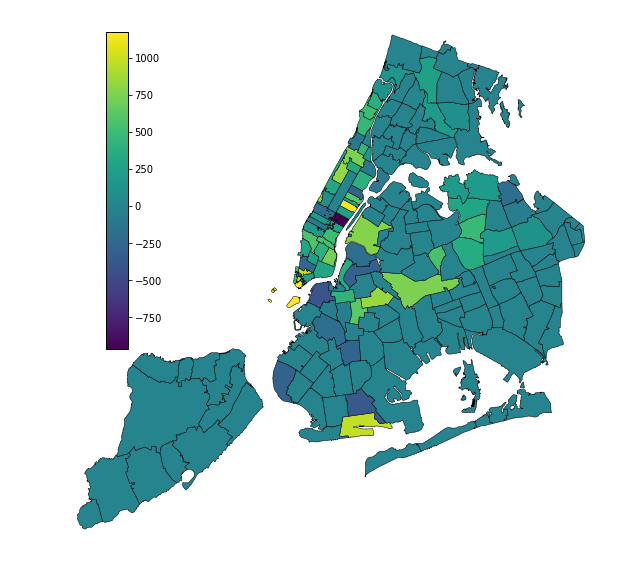

In [134]:
cp.choroplethNYC(df_geo, column="change", color="k",cmap="viridis", edgecolor="k", lw=0.5);

Fig 2: The above figure shows the map of NYC with the color of the zipcode indicating the increase in median income from 2010 to 2018

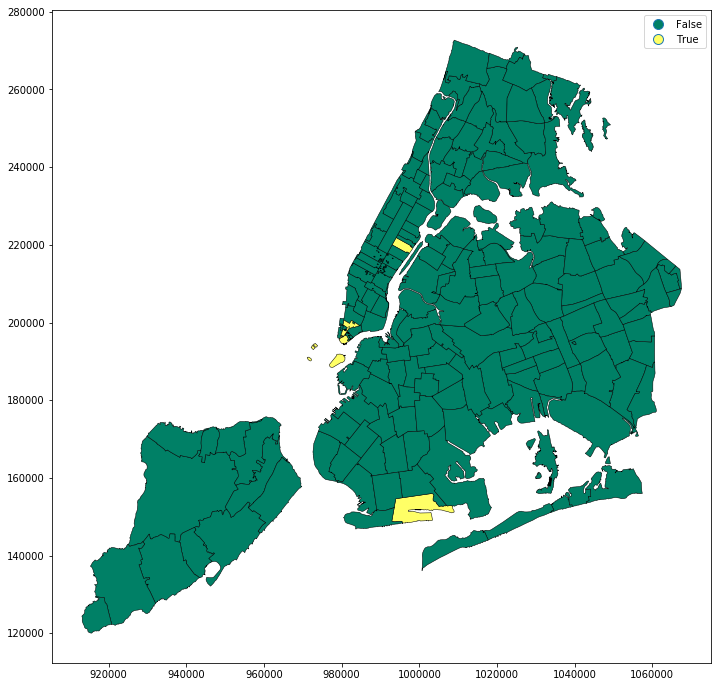

In [148]:
df_geo.plot(column='gentrified', figsize=(20,12), cmap='summer',edgecolor = 'k', lw = 0.5, legend=True)

Fig 3: The above figure shows the map of gentrification between 2010 and 2018

This map does not align with the citylab or other reference maps of gentrification